In [ ]:
import numpy as np
from itertools import product

In [ ]:
!git clone https://github.com/tilleyd/cec2017-py

Cloning into 'cec2017-py'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 135 (delta 70), reused 105 (delta 45), pack-reused 0
Receiving objects: 100% (135/135), 2.69 MiB | 4.57 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
cd cec2017-py

/content/cec2017-py/cec2017-py


In [ ]:
ls

cec2017/  example.py*  extra/  LICENSE.txt  MANIFEST.in  README.md  setup.py  tests/


In [ ]:
!python3 setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
# Define the Rastrigin cost function
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

In [ ]:
# Define the PSO algorithm
class Particle:
    def __init__(self, bounds, dim):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = np.copy(self.position)
        self.best_cost = rastrigin(self.position)
        self.cost = self.best_cost

class PSO:
    def __init__(self, cost_function, dim, bounds, num_particles, max_iter, w=0.5, c1=1.5, c2=1.5):
        self.cost_function = cost_function
        self.dim = dim
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.swarm = [Particle(bounds, dim) for _ in range(num_particles)]
        self.global_best_position = np.copy(self.swarm[0].position)
        self.global_best_cost = self.swarm[0].cost

    def optimize(self):
        for iter in range(self.max_iter):
            for particle in self.swarm:
                particle.velocity = (self.w * particle.velocity
                                    + self.c1 * np.random.rand(self.dim) * (particle.best_position - particle.position)
                                    + self.c2 * np.random.rand(self.dim) * (self.global_best_position - particle.position))

                particle.position = particle.position + particle.velocity

                # Apply bounds
                particle.position = np.clip(particle.position, self.bounds[0], self.bounds[1])

                # Evaluate cost
                particle.cost = self.cost_function(particle.position)

                # Update personal best
                if particle.cost < particle.best_cost:
                    particle.best_position = np.copy(particle.position)
                    particle.best_cost = particle.cost

                # Update global best
                if particle.cost < self.global_best_cost:
                    self.global_best_position = np.copy(particle.position)
                    self.global_best_cost = particle.cost

            print(f"Iteration {iter + 1}/{self.max_iter}, Global Best Cost: {self.global_best_cost}")

        return self.global_best_position, self.global_best_cost, [particle.best_cost for particle in self.swarm]


In [ ]:
# Set parameters for the PSO algorithm
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_particles = 30  # Number of particles in the swarm
max_iter = 100  # Number of iterations

# Create a PSO instance and optimize
pso = PSO(cost_function=rastrigin, dim=dim, bounds=bounds, num_particles=num_particles, max_iter=max_iter)
best_position, best_cost, final_costs = pso.optimize()

# Compute statistics
best = np.min(final_costs)
mean = np.mean(final_costs)
median = np.median(final_costs)
worst = np.max(final_costs)
std_dev = np.std(final_costs)

# Output results
print(f"Best Cost: {best}")
print(f"Mean Cost: {mean}")
print(f"Median Cost: {median}")
print(f"Worst Cost: {worst}")
print(f"Standard Deviation: {std_dev}")

Iteration 1/100, Global Best Cost: 8790.684210959336
Iteration 2/100, Global Best Cost: 6629.766013319831
Iteration 3/100, Global Best Cost: 3682.449481357793
Iteration 4/100, Global Best Cost: 2498.050498762851
Iteration 5/100, Global Best Cost: 2498.050498762851
Iteration 6/100, Global Best Cost: 1771.1371129199413
Iteration 7/100, Global Best Cost: 919.696729928381
Iteration 8/100, Global Best Cost: 919.696729928381
Iteration 9/100, Global Best Cost: 554.6871808932917
Iteration 10/100, Global Best Cost: 554.6871808932917
Iteration 11/100, Global Best Cost: 473.8197897120854
Iteration 12/100, Global Best Cost: 393.33196913296814
Iteration 13/100, Global Best Cost: 227.4006967989806
Iteration 14/100, Global Best Cost: 227.4006967989806
Iteration 15/100, Global Best Cost: 227.4006967989806
Iteration 16/100, Global Best Cost: 227.4006967989806
Iteration 17/100, Global Best Cost: 185.57246408774927
Iteration 18/100, Global Best Cost: 181.77385729752763
Iteration 19/100, Global Best Cost:

In [ ]:
# Define the ACO algorithm
class Ant:
    def __init__(self, bounds, dim):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.cost = rastrigin(self.position)

class ACO:
    def __init__(self, cost_function, dim, bounds, num_ants, max_iter, alpha=1.0, beta=2.0, rho=0.5, Q=100):
        self.cost_function = cost_function
        self.dim = dim
        self.bounds = bounds
        self.num_ants = num_ants
        self.max_iter = max_iter
        self.alpha = alpha  # influence of pheromone
        self.beta = beta    # influence of heuristic information
        self.rho = rho      # pheromone evaporation rate
        self.Q = Q          # pheromone deposit factor

        self.pheromone = np.ones((dim, 2))  # Initialize pheromone levels
        self.best_position = None
        self.best_cost = np.inf

    def _initialize_ants(self):
        self.ants = [Ant(self.bounds, self.dim) for _ in range(self.num_ants)]
        for ant in self.ants:
            if ant.cost < self.best_cost:
                self.best_position = np.copy(ant.position)
                self.best_cost = ant.cost

    def _update_pheromone(self):
        for ant in self.ants:
            for d in range(self.dim):
                delta_pheromone = self.Q / ant.cost
                if ant.position[d] > 0:
                    self.pheromone[d, 1] += delta_pheromone
                else:
                    self.pheromone[d, 0] += delta_pheromone

        # Evaporation
        self.pheromone *= (1 - self.rho)

    def _select_next_position(self, current_pos):
        next_position = np.zeros(self.dim)
        for d in range(self.dim):
            if np.random.rand() < self.pheromone[d, 1] / (self.pheromone[d, 0] + self.pheromone[d, 1]):
                next_position[d] = np.random.uniform(0, self.bounds[1])
            else:
                next_position[d] = np.random.uniform(self.bounds[0], 0)
        return next_position

    def optimize(self):
        self._initialize_ants()

        for iter in range(self.max_iter):
            for ant in self.ants:
                ant.position = self._select_next_position(ant.position)
                ant.position = np.clip(ant.position, self.bounds[0], self.bounds[1])
                ant.cost = self.cost_function(ant.position)
                if ant.cost < self.best_cost:
                    self.best_position = np.copy(ant.position)
                    self.best_cost = ant.cost

            self._update_pheromone()
            print(f"Iteration {iter + 1}/{self.max_iter}, Best Cost: {self.best_cost}")

        final_costs = [ant.cost for ant in self.ants]
        return self.best_position, self.best_cost, final_costs

In [ ]:

# Set parameters for the ACO algorithm
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_ants = 30  # Number of ants in the colony
max_iter = 100  # Number of iterations

# Create an ACO instance and optimize
aco = ACO(cost_function=rastrigin, dim=dim, bounds=bounds, num_ants=num_ants, max_iter=max_iter)
best_position, best_cost, final_costs = aco.optimize()

# Compute statistics
best = np.min(final_costs)
mean = np.mean(final_costs)
median = np.median(final_costs)
worst = np.max(final_costs)
std_dev = np.std(final_costs)

# Output results
print(f"Best Cost: {best}")
print(f"Mean Cost: {mean}")
print(f"Median Cost: {median}")
print(f"Worst Cost: {worst}")
print(f"Standard Deviation: {std_dev}")

Iteration 1/100, Best Cost: 13316.652655520787
Iteration 2/100, Best Cost: 9337.575643111732
Iteration 3/100, Best Cost: 9337.575643111732
Iteration 4/100, Best Cost: 9337.575643111732
Iteration 5/100, Best Cost: 9337.575643111732
Iteration 6/100, Best Cost: 9337.575643111732
Iteration 7/100, Best Cost: 9337.575643111732
Iteration 8/100, Best Cost: 9337.575643111732
Iteration 9/100, Best Cost: 9337.575643111732
Iteration 10/100, Best Cost: 9337.575643111732
Iteration 11/100, Best Cost: 9337.575643111732
Iteration 12/100, Best Cost: 9337.575643111732
Iteration 13/100, Best Cost: 9337.575643111732
Iteration 14/100, Best Cost: 9337.575643111732
Iteration 15/100, Best Cost: 9337.575643111732
Iteration 16/100, Best Cost: 9337.575643111732
Iteration 17/100, Best Cost: 9337.575643111732
Iteration 18/100, Best Cost: 9337.575643111732
Iteration 19/100, Best Cost: 9337.575643111732
Iteration 20/100, Best Cost: 9337.575643111732
Iteration 21/100, Best Cost: 9337.575643111732
Iteration 22/100, Bes

In [ ]:
# Hyper parameter tuning for PSO
pso_param_grid = {
    'w': [0.3, 0.5, 0.7],
    'c1': [1.0, 1.5, 2.0],
    'c2': [1.0, 1.5, 2.0]
}

best_pso_params = None
best_pso_cost = np.inf
num_runs = 5

for params in product(*pso_param_grid.values()):
  run_costs = []
  for _ in range(num_runs):
    pso = PSO(cost_function=rastrigin, dim=10, bounds=(-100, 100), num_particles=30, max_iter=100,
              w=params[0], c1=params[1], c2=params[2])
    _, best_cost, _ = pso.optimize()
    run_costs.append(best_cost)

  avg_cost = np.mean(run_costs)
  if avg_cost < best_pso_cost:
    best_pso_cost = avg_cost
    best_pso_params = params

print(f"Best PSO Hyperparameters: w={best_pso_params[0]}, c1={best_pso_params[1]}, c2={best_pso_params[2]}")
print(f"Best PSO Cost: {best_pso_cost}")

Streaming output truncated to the last 5000 lines.
Iteration 3/100, Global Best Cost: 13258.775996405682
Iteration 4/100, Global Best Cost: 7285.694562462651
Iteration 5/100, Global Best Cost: 7285.694562462651
Iteration 6/100, Global Best Cost: 5668.189254519296
Iteration 7/100, Global Best Cost: 4674.912952686133
Iteration 8/100, Global Best Cost: 2188.0799233191065
Iteration 9/100, Global Best Cost: 2188.0799233191065
Iteration 10/100, Global Best Cost: 1918.9623419389322
Iteration 11/100, Global Best Cost: 1918.9623419389322
Iteration 12/100, Global Best Cost: 1517.0811656995193
Iteration 13/100, Global Best Cost: 1517.0811656995193
Iteration 14/100, Global Best Cost: 1089.148988595979
Iteration 15/100, Global Best Cost: 771.6860888369105
Iteration 16/100, Global Best Cost: 771.6860888369105
Iteration 17/100, Global Best Cost: 771.6860888369105
Iteration 18/100, Global Best Cost: 661.5069508695269
Iteration 19/100, Global Best Cost: 661.5069508695269
Iteration 20/100, Global Best C

In [ ]:
# Hyperparameter tuning for ACO
aco_param_grid = {
    'alpha': [0.5, 1.0, 1.5],
    'beta': [1.0, 2.0, 3.0],
    'rho': [0.1, 0.5, 0.9],
    'Q': [50, 100, 150]
}

best_aco_params = None
best_aco_cost = np.inf
num_runs = 5

for params in product(*aco_param_grid.values()):
  run_costs = []
  for _ in range(num_runs):
    aco = ACO(cost_function=rastrigin, dim=10, bounds=(-100, 100), num_ants=30, max_iter=100,
              alpha=params[0], beta=params[1], rho=params[2], Q=params[3])
    _, best_cost, _ = aco.optimize()
    run_costs.append(best_cost)

  avg_cost = np.mean(run_costs)
  if avg_cost < best_aco_cost:
    best_aco_cost = avg_cost
    best_aco_params = params

print(f"Best ACO Hyperparameters: alpha={best_aco_params[0]}, beta={best_aco_params[1]}, rho={best_aco_params[2]}, Q={best_aco_params[3]}")
print(f"Best ACO Cost: {best_aco_cost}")

Streaming output truncated to the last 5000 lines.
Iteration 3/100, Best Cost: 11106.875480968663
Iteration 4/100, Best Cost: 11106.875480968663
Iteration 5/100, Best Cost: 11106.875480968663
Iteration 6/100, Best Cost: 11106.875480968663
Iteration 7/100, Best Cost: 11106.875480968663
Iteration 8/100, Best Cost: 11106.875480968663
Iteration 9/100, Best Cost: 11106.875480968663
Iteration 10/100, Best Cost: 11106.875480968663
Iteration 11/100, Best Cost: 11106.875480968663
Iteration 12/100, Best Cost: 11106.875480968663
Iteration 13/100, Best Cost: 11106.875480968663
Iteration 14/100, Best Cost: 11106.875480968663
Iteration 15/100, Best Cost: 11106.875480968663
Iteration 16/100, Best Cost: 11106.875480968663
Iteration 17/100, Best Cost: 11106.875480968663
Iteration 18/100, Best Cost: 11106.875480968663
Iteration 19/100, Best Cost: 11106.875480968663
Iteration 20/100, Best Cost: 11106.875480968663
Iteration 21/100, Best Cost: 11106.875480968663
Iteration 22/100, Best Cost: 11106.875480968

In [ ]:
# Define the Particle class for PSO
class Particle:
    def __init__(self, bounds, dim, cost_function):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = np.copy(self.position)
        self.best_cost = cost_function(self.position)
        self.cost = self.best_cost

# Define the Ant class for ACO
class Ant:
    def __init__(self, bounds, dim, cost_function):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.cost = cost_function(self.position)

# Define the Hybrid PSO-ACO class
class HybridPSOACO:
    def __init__(self, cost_function, dim, bounds, num_particles, num_ants, max_iter, w=0.5, c1=1.5, c2=1.5, alpha=1.0, beta=2.0, rho=0.5, Q=100):
        self.cost_function = cost_function
        self.dim = dim
        self.bounds = bounds
        self.num_particles = num_particles
        self.num_ants = num_ants
        self.max_iter = max_iter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q

        self.particles = [Particle(bounds, dim, cost_function) for _ in range(num_particles)]
        self.ants = [Ant(bounds, dim, cost_function) for _ in range(num_ants)]
        self.pheromone = np.ones((dim, 2))  # Initialize pheromone levels
        self.global_best_position = np.copy(self.particles[0].position)
        self.global_best_cost = self.particles[0].cost
        self.convergence = []
        self.final_costs = None

    def optimize(self):
        for iter in range(self.max_iter):
            # PSO part
            for particle in self.particles:
                particle.velocity = (self.w * particle.velocity
                                    + self.c1 * np.random.rand(self.dim) * (particle.best_position - particle.position)
                                    + self.c2 * np.random.rand(self.dim) * (self.global_best_position - particle.position))

                particle.position = particle.position + particle.velocity
                particle.position = np.clip(particle.position, self.bounds[0], self.bounds[1])
                particle.cost = self.cost_function(particle.position)

                if particle.cost < particle.best_cost:
                    particle.best_position = np.copy(particle.position)
                    particle.best_cost = particle.cost

                if particle.cost < self.global_best_cost:
                    self.global_best_position = np.copy(particle.position)
                    self.global_best_cost = particle.cost

            # ACO part
            for ant in self.ants:
                ant.position = self._select_next_position(ant.position)
                ant.position = np.clip(ant.position, self.bounds[0], self.bounds[1])
                ant.cost = self.cost_function(ant.position)

                if ant.cost < self.global_best_cost:
                    self.global_best_position = np.copy(ant.position)
                    self.global_best_cost = ant.cost

            self._update_pheromone()
            self.convergence.append(self.global_best_cost)
            print(f"Iteration {iter + 1}/{self.max_iter}, Global Best Cost: {self.global_best_cost}")

        self.final_costs = [particle.best_cost for particle in self.particles] + [ant.cost for ant in self.ants]
        return self.global_best_position, self.global_best_cost, self.final_costs

    def _update_pheromone(self):
        for ant in self.ants:
            for d in range(self.dim):
                delta_pheromone = self.Q / ant.cost
                if ant.position[d] > 0:
                    self.pheromone[d, 1] += delta_pheromone
                else:
                    self.pheromone[d, 0] += delta_pheromone

        self.pheromone *= (1 - self.rho)

    def _select_next_position(self, current_pos):
        next_position = np.zeros(self.dim)
        for d in range(self.dim):
            if np.random.rand() < self.pheromone[d, 1] / (self.pheromone[d, 0] + self.pheromone[d, 1]):
                next_position[d] = np.random.uniform(0, self.bounds[1])
            else:
                next_position[d] = np.random.uniform(self.bounds[0], 0)
        return next_position

In [ ]:
# Set parameters for the Hybrid PSO-ACO algorithm
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_particles = 15  # Number of particles in the swarm
num_ants = 15  # Number of ants in the colony
max_iter = 100  # Number of iterations

# Create a Hybrid PSO-ACO instance and optimize
hybrid = HybridPSOACO(cost_function=rastrigin, dim=dim, bounds=bounds, num_particles=num_particles, num_ants=num_ants, max_iter=max_iter)
best_position, best_cost, final_costs = hybrid.optimize()

# Compute statistics
best = np.min(final_costs)
mean = np.mean(final_costs)
median = np.median(final_costs)
worst = np.max(final_costs)
std_dev = np.std(final_costs)

# Output results
print(f"Best Cost: {best}")
print(f"Mean Cost: {mean}")
print(f"Median Cost: {median}")
print(f"Worst Cost: {worst}")
print(f"Standard Deviation: {std_dev}")


Iteration 1/100, Global Best Cost: 9452.804858415739
Iteration 2/100, Global Best Cost: 8229.750754210387
Iteration 3/100, Global Best Cost: 6106.923529484047
Iteration 4/100, Global Best Cost: 3432.944159645546
Iteration 5/100, Global Best Cost: 2903.6781087682666
Iteration 6/100, Global Best Cost: 1863.6533820597867
Iteration 7/100, Global Best Cost: 1863.6533820597867
Iteration 8/100, Global Best Cost: 1221.774124379575
Iteration 9/100, Global Best Cost: 876.9152418099652
Iteration 10/100, Global Best Cost: 876.9152418099652
Iteration 11/100, Global Best Cost: 591.2425187199314
Iteration 12/100, Global Best Cost: 521.8678426344018
Iteration 13/100, Global Best Cost: 478.9047303486072
Iteration 14/100, Global Best Cost: 378.5312899845496
Iteration 15/100, Global Best Cost: 296.5691498463764
Iteration 16/100, Global Best Cost: 172.9302589684279
Iteration 17/100, Global Best Cost: 119.70015985241334
Iteration 18/100, Global Best Cost: 117.34204819885103
Iteration 19/100, Global Best Co

In [ ]:
best_hybrid_params = None
best_hybrid_cost = np.inf
num_runs = 5  # Number of runs for each set of hyperparameters

# Hyperparameter tuning for Hybrid PSO-ACO
hybrid_param_grid = {
    'w': [0.3, 0.5, 0.7],
    'c1': [1.0, 1.5, 2.0],
    'c2': [1.0, 1.5, 2.0],
    'alpha': [0.5, 1.0, 1.5],
    'beta': [1.0, 2.0, 3.0],
    'rho': [0.1, 0.5, 0.9],
    'Q': [50, 100, 150]
}

for params in product(*hybrid_param_grid.values()):
    run_costs = []
    for _ in range(num_runs):
        hybrid = HybridPSOACO(cost_function=rastrigin, dim=10, bounds=(-100, 100), num_particles=15, num_ants=15, max_iter=100,
                              w=params[0], c1=params[1], c2=params[2], alpha=params[3], beta=params[4], rho=params[5], Q=params[6])
        _, best_cost, _ = hybrid.optimize()
        run_costs.append(best_cost)

    avg_cost = np.mean(run_costs)
    if avg_cost < best_hybrid_cost:
        best_hybrid_cost = avg_cost
        best_hybrid_params = {'w': params[0], 'c1': params[1], 'c2': params[2], 'alpha': params[3], 'beta': params[4], 'rho': params[5], 'Q': params[6]}

print(f"Best Hybrid PSO-ACO Hyperparameters: w={best_hybrid_params['w']}, c1={best_hybrid_params['c1']}, c2={best_hybrid_params['c2']}, alpha={best_hybrid_params['alpha']}, beta={best_hybrid_params['beta']}, rho={best_hybrid_params['rho']}, Q={best_hybrid_params['Q']}")
print(f"Best Hybrid PSO-ACO Cost: {best_hybrid_cost}")

Streaming output truncated to the last 5000 lines.
Iteration 3/100, Global Best Cost: 8752.490039938752
Iteration 4/100, Global Best Cost: 8752.490039938752
Iteration 5/100, Global Best Cost: 7607.287065960001
Iteration 6/100, Global Best Cost: 7607.287065960001
Iteration 7/100, Global Best Cost: 7607.287065960001
Iteration 8/100, Global Best Cost: 7607.287065960001
Iteration 9/100, Global Best Cost: 7607.287065960001
Iteration 10/100, Global Best Cost: 6181.535624491956
Iteration 11/100, Global Best Cost: 6181.535624491956
Iteration 12/100, Global Best Cost: 6181.535624491956
Iteration 13/100, Global Best Cost: 5151.328754005528
Iteration 14/100, Global Best Cost: 5151.328754005528
Iteration 15/100, Global Best Cost: 5151.328754005528
Iteration 16/100, Global Best Cost: 5151.328754005528
Iteration 17/100, Global Best Cost: 5151.328754005528
Iteration 18/100, Global Best Cost: 5151.328754005528
Iteration 19/100, Global Best Cost: 5151.328754005528
Iteration 20/100, Global Best Cost: 51

In [ ]:
# Set parameters for the Hybrid PSO-ACO algorithm
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_particles = 15  # Number of particles in the swarm
num_ants = 15  # Number of ants in the colony
max_iter = 100  # Number of iterations
run_costs=[]
best_costs=[]
num_runs = 5
best_hybrid_params=[0.5, 2.0,1.5, 0.5, 2.0,0.5,150]

# Create a Hybrid PSO-ACO instance and optimize
for i in range(num_runs):
  hybrid = HybridPSOACO(cost_function=rastrigin, dim=dim, bounds=bounds, num_particles=num_particles, num_ants=num_ants, max_iter=max_iter,
                          w=best_hybrid_params[0], c1=best_hybrid_params[1], c2=best_hybrid_params[2], alpha=best_hybrid_params[3], beta=best_hybrid_params[4], rho=best_hybrid_params[5], Q=best_hybrid_params[6])
  _, best_cost, final_cost = hybrid.optimize()
  best_costs.append(best_cost)
  run_costs.append(final_cost)


# Compute statistics
best = np.min(best_costs)
mean = np.mean(run_costs)
median = np.median(run_costs)
worst = np.max(run_costs)
std_dev = np.std(run_costs)

# Output results
print(f"Best Cost: {best}")
print(f"Mean Cost: {mean}")
print(f"Median Cost: {median}")
print(f"Worst Cost: {worst}")
print(f"Standard Deviation: {std_dev}")

Iteration 1/100, Global Best Cost: 11521.77282677022
Iteration 2/100, Global Best Cost: 6036.074412216483
Iteration 3/100, Global Best Cost: 6036.074412216483
Iteration 4/100, Global Best Cost: 5398.736660648626
Iteration 5/100, Global Best Cost: 4465.483160006526
Iteration 6/100, Global Best Cost: 4465.483160006526
Iteration 7/100, Global Best Cost: 2685.967787220493
Iteration 8/100, Global Best Cost: 2685.967787220493
Iteration 9/100, Global Best Cost: 2360.956072128771
Iteration 10/100, Global Best Cost: 2360.956072128771
Iteration 11/100, Global Best Cost: 2052.8573183994195
Iteration 12/100, Global Best Cost: 1670.6749757967405
Iteration 13/100, Global Best Cost: 1584.3368668995943
Iteration 14/100, Global Best Cost: 1339.4856725710104
Iteration 15/100, Global Best Cost: 890.805869045143
Iteration 16/100, Global Best Cost: 890.805869045143
Iteration 17/100, Global Best Cost: 783.737089435239
Iteration 18/100, Global Best Cost: 783.737089435239
Iteration 19/100, Global Best Cost: 7

In [ ]:
# Set parameters for the Hybrid PSO-ACO algorithm
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_particles = 15  # Number of particles in the swarm
num_ants = 15  # Number of ants in the colony
max_iter = 100  # Number of iterations
run_costs=[]
num_runs = 5
best_costs=[]

combined_params = {
        'w': 0.5,
        'c1': 2.0,
        'c2': 1.5,
        'alpha': 1.0,
        'beta': 2.0,
        'rho': 0.9,
        'Q': 100
    }

#combined_params = {
#        'w': best_pso_params[0],
#        'c1': best_pso_params[1],
#        'c2': best_pso_params[2],
#        'alpha': best_aco_params[0],
#        'beta': best_aco_params[1],
#        'rho': best_aco_params[2],
#        'Q': best_aco_params[3]
#    }

# Create a Hybrid PSO-ACO instance and optimize
for i in range(num_runs):
  hybrid = HybridPSOACO(cost_function=rastrigin, dim=dim, bounds=bounds, num_particles=num_particles, num_ants=num_ants, max_iter=max_iter,
                      w=combined_params['w'], c1=combined_params['c1'], c2=combined_params['c2'], alpha=combined_params['alpha'],
                      beta=combined_params['beta'], rho=combined_params['rho'], Q=combined_params['Q'])
  _, best_cost, final_cost = hybrid.optimize()
  best_costs.append(best_cost)
  run_costs.append(final_cost)


# num_runs = 5
# Best Hybrid PSO-ACO Hyperparameters: w=0.5, c1=2.0, c2=1.5, alpha=0.5, beta=2.0, rho=0.5, Q=150
# Best PSO Hyperparameters: w=0.5, c1=2.0, c2=1.5
# Best ACO Hyperparameters: alpha=1.0, beta=2.0, rho=0.9, Q=100

# Best Hybrid PSO-ACO Hyperparameters: w=0.3, c1=1.5, c2=2.0, alpha=1.0, beta=2.0, rho=0.9, Q=150
# Best ACO Hyperparameters: alpha=0.5, beta=1.0, rho=0.1, Q=150
# Best PSO Hyperparameters: w=0.5, c1=2.0, c2=1.0

# Compute statistics
# final_costs=np.mean(run_costs)
best = np.min(best_costs)
mean = np.mean(run_costs)
median = np.median(run_costs)
worst = np.max(run_costs)
std_dev = np.std(run_costs)

# Output results
print(f"Best Cost: {best}")
print(f"Mean Cost: {mean}")
print(f"Median Cost: {median}")
print(f"Worst Cost: {worst}")
print(f"Standard Deviation: {std_dev}")

Iteration 1/100, Global Best Cost: 10358.039653180322
Iteration 2/100, Global Best Cost: 8459.449763101919
Iteration 3/100, Global Best Cost: 6995.989565643737
Iteration 4/100, Global Best Cost: 6995.989565643737
Iteration 5/100, Global Best Cost: 5781.749012248194
Iteration 6/100, Global Best Cost: 4536.902372579089
Iteration 7/100, Global Best Cost: 3177.657425169359
Iteration 8/100, Global Best Cost: 3177.657425169359
Iteration 9/100, Global Best Cost: 2465.454254946348
Iteration 10/100, Global Best Cost: 2465.454254946348
Iteration 11/100, Global Best Cost: 1948.1366919235502
Iteration 12/100, Global Best Cost: 1948.1366919235502
Iteration 13/100, Global Best Cost: 1685.9215582167296
Iteration 14/100, Global Best Cost: 1589.6911000124844
Iteration 15/100, Global Best Cost: 1073.6766489683998
Iteration 16/100, Global Best Cost: 688.0170655889647
Iteration 17/100, Global Best Cost: 382.9882002927203
Iteration 18/100, Global Best Cost: 382.9882002927203
Iteration 19/100, Global Best C

In [ ]:
# Set parameters for the Hybrid PSO-ACO algorithm using the best hyperparameters found
dim = 10  # Number of dimensions
bounds = (-100, 100)  # Domain bounds
num_particles = 15  # Number of particles in the swarm
num_ants = 15  # Number of ants in the colony
max_iter = 100  # Number of iterations
# Function to run the optimization and collect convergence data
def run_optimization(model_class, cost_function, params, label):
    model = model_class(
        cost_function=cost_function,
        dim=dim,
        bounds=bounds,
        num_particles=num_particles,
        num_ants=num_ants,
        max_iter=max_iter,
        **params
    )
    model.optimize()
    return model.convergence, model.global_best_cost, model.final_costs

In [ ]:
import cec2017.functions as functions
# Collect convergence data for the first 10 CEC 2017 test functions
convergence_hybrid_best = []
convergence_hybrid_individual = []
cec_functions = [functions.f1, functions.f2, functions.f3, functions.f4, functions.f5, functions.f6, functions.f7, functions.f8, functions.f9, functions.f10]
best_costs=[]
final_costs = []

best_hybrid_params={
    'w':0.5,
    'c1':2.0,
    'c2':1.5,
    'alpha':0.5,
    'beta':2.0,
    'rho':0.5,
    'Q':150}

# Best PSO Hyperparameters: w=0.5, c1=2.0, c2=1.5
# Best ACO Hyperparameters: alpha=1.0, beta=2.0, rho=0.9, Q=100
combined_params = {
        'w': 0.5,
        'c1': 2.0,
        'c2': 1.5,
        'alpha': 1.0,
        'beta': 2.0,
        'rho': 0.9,
        'Q': 100
    }

for func in cec_functions:
    #convergence, best_cost = run_optimization(HybridPSOACO, func, best_hybrid_params, 'Hybrid Best Params')
    #convergence_hybrid_best.append(convergence)
    #print(f"Hybrid Best Params - Best Cost for {func.__name__}: {best_cost}")
    #convergence, best_cost = run_optimization(HybridPSOACO, func, combined_params, 'Hybrid Individual Params')
    #convergence_hybrid_individual.append(convergence)
    #print(f"Hybrid Individual Params - Best Cost for {func.__name__}: {best_cost}")
    convergence, best_cost_h, final_costs_h = run_optimization(HybridPSOACO, lambda x: func(x[None,:]), best_hybrid_params, 'Hybrid Best Params')
    convergence_hybrid_best.append(convergence)

    convergence, best_cost_i, final_costs_i = run_optimization(HybridPSOACO, lambda x: func(x[None,:]), combined_params, 'Hybrid Individual Params')
    convergence_hybrid_individual.append(convergence)
    best_costs.append((best_cost_h[0],best_cost_i[0]))
    final_costs.append((final_costs_h,final_costs_i))

for i,func in enumerate(cec_functions):
    print("====================================================================")
    print(f"Hybrid Best Params - Best Cost for {func.__name__}: {best_costs[i][0]}")
    print(f"Hybrid Individual Params - Best Cost for {func.__name__}: {best_costs[i][1]}")
    print("====================================================================")
    print(f"Hybrid Best Params - Final Cost for {func.__name__}:")
    # Compute statistics
    best = np.min(final_costs[i][0])
    mean = np.mean(final_costs[i][0])
    median = np.median(final_costs[i][0])
    worst = np.max(final_costs[i][0])
    std_dev = np.std(final_costs[i][0])

    # Output results
    print(f"Best Cost: {best}")
    print(f"Mean Cost: {mean}")
    print(f"Median Cost: {median}")
    print(f"Worst Cost: {worst}")
    print(f"Standard Deviation: {std_dev}")

    print("--------------------------------------------------------------------")
    print(f"Hybrid Individual Params - Final Cost for {func.__name__}:")
    # Compute statistics
    best_i = np.min(final_costs[i][1])
    mean_i = np.mean(final_costs[i][1])
    median_i = np.median(final_costs[i][1])
    worst_i = np.max(final_costs[i][1])
    std_dev_i = np.std(final_costs[i][1])

    # Output results
    print(f"Best Cost: {best_i}")
    print(f"Mean Cost: {mean_i}")
    print(f"Median Cost: {median_i}")
    print(f"Worst Cost: {worst_i}")
    print(f"Standard Deviation: {std_dev_i}")



<ipython-input-29-8cb5b2d30ff6>:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromone[d, 1] += delta_pheromone
<ipython-input-29-8cb5b2d30ff6>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromone[d, 0] += delta_pheromone


Iteration 1/100, Global Best Cost: [1.7778491e+11]
Iteration 2/100, Global Best Cost: [1.28586033e+11]
Iteration 3/100, Global Best Cost: [7.8559394e+10]
Iteration 4/100, Global Best Cost: [7.8559394e+10]
Iteration 5/100, Global Best Cost: [7.65149639e+10]
Iteration 6/100, Global Best Cost: [7.09439687e+10]
Iteration 7/100, Global Best Cost: [3.96754601e+10]
Iteration 8/100, Global Best Cost: [2.64197986e+10]
Iteration 9/100, Global Best Cost: [2.64197986e+10]
Iteration 10/100, Global Best Cost: [2.64197986e+10]
Iteration 11/100, Global Best Cost: [1.75886055e+10]
Iteration 12/100, Global Best Cost: [1.60963325e+10]
Iteration 13/100, Global Best Cost: [1.58587689e+10]
Iteration 14/100, Global Best Cost: [1.58587689e+10]
Iteration 15/100, Global Best Cost: [1.53546724e+10]
Iteration 16/100, Global Best Cost: [1.3319682e+10]
Iteration 17/100, Global Best Cost: [1.27232862e+10]
Iteration 18/100, Global Best Cost: [1.17317229e+10]
Iteration 19/100, Global Best Cost: [1.16511965e+10]
Iterat

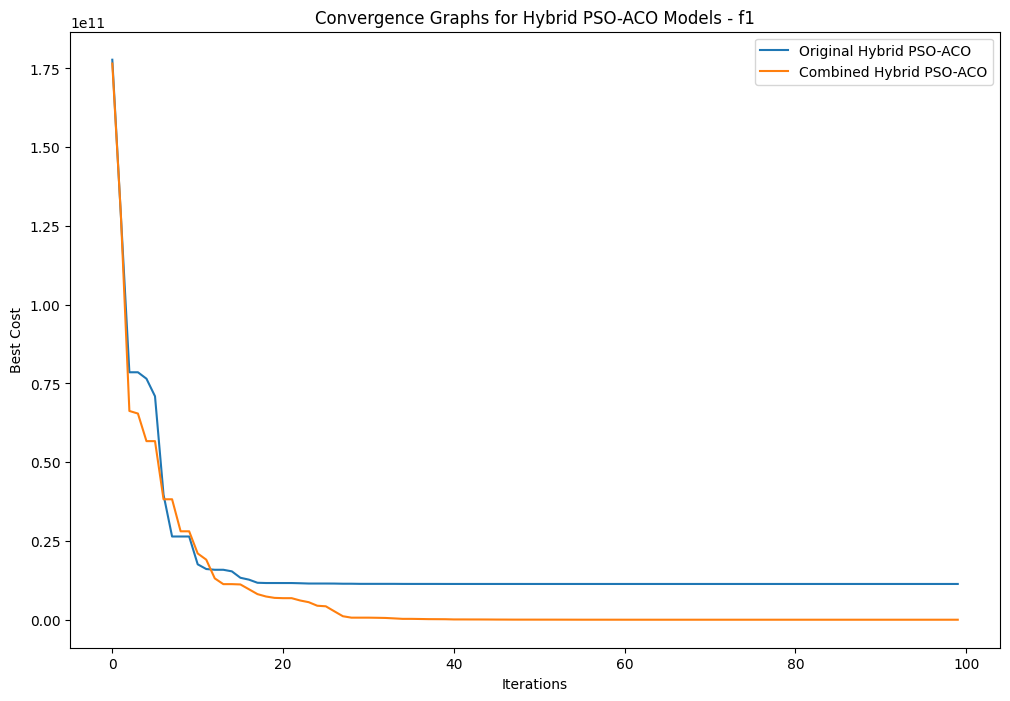

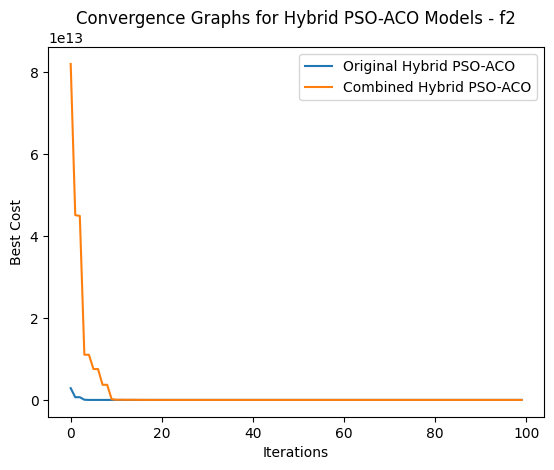

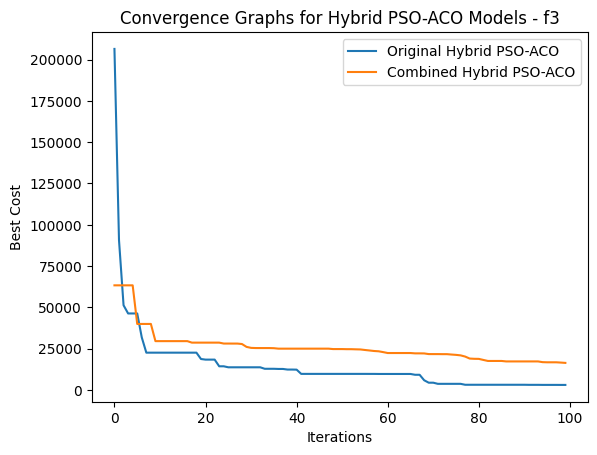

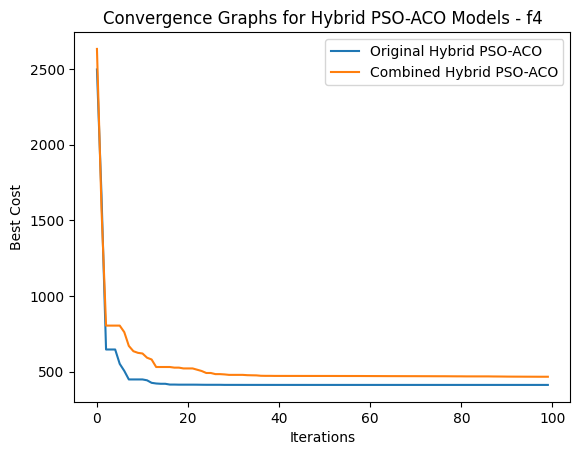

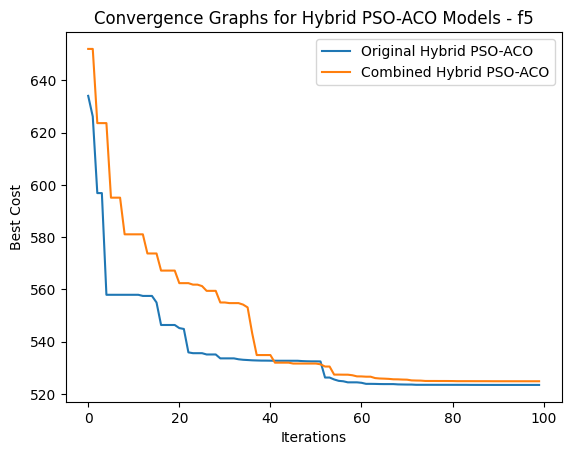

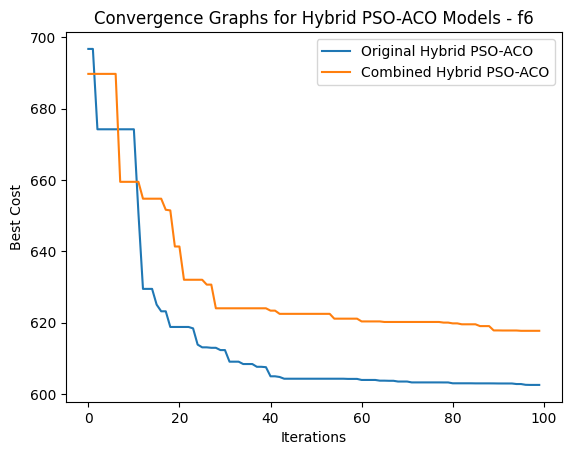

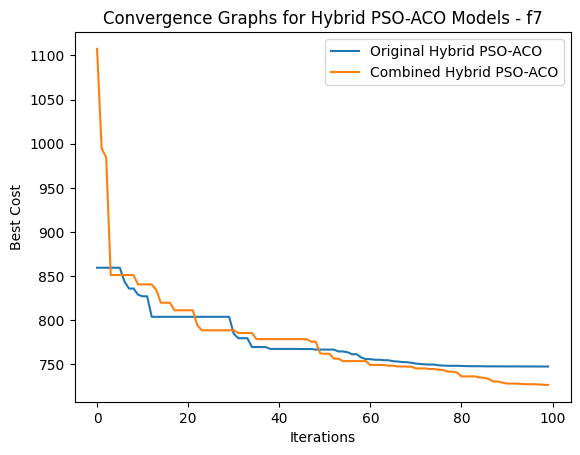

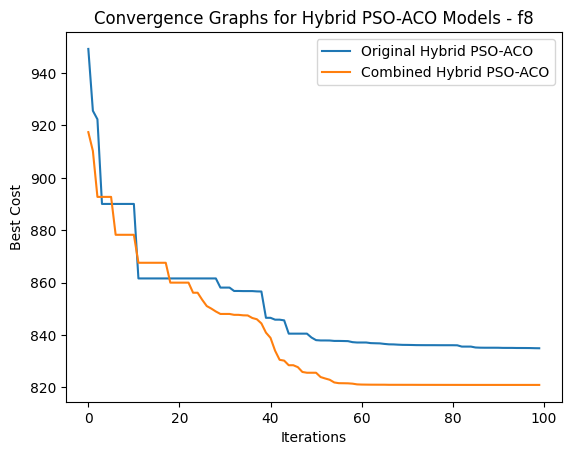

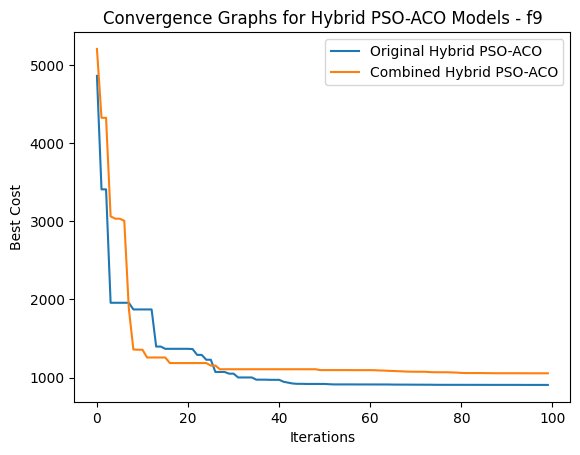

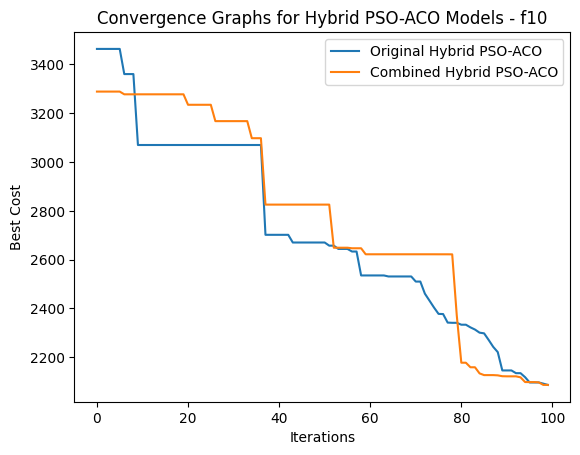

In [ ]:
import matplotlib.pyplot as plt
# Plot convergence graphs for both models
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(convergence_hybrid_best[i], label=f'Original Hybrid PSO-ACO')
    plt.plot(convergence_hybrid_individual[i], label=f'Combined Hybrid PSO-ACO')
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('Convergence Graphs for Hybrid PSO-ACO Models - f'+ f'{i+1}')
    plt.legend()
    plt.show()